In [17]:
import tellurium as te

##**Computational model of EGFR and IGF1R pathways in lung cancer**##


---
This project will give you the overall idea of EGFR and IGF1R activity and its impact in lung cancer. 

Cancer is far too complicated a disease to be defined purely and totally by the clinical factors now utilized in practice. As a result, it is critical to discover novel biomarkers that will reveal more information regarding the cancer's kind, origin, or aggressiveness. Amongst all the types of cancers, lung cancer contribute to the most of the mortality rate. Although there are different medications that are available, a clear understanding on the moelcular level studies help to curate a lot of medications available to cure the disease.

###**EGFR and IGF1R**

High EGFR (Epidermal Growth Factor Receptor) and IGF1R (Type 1 Insulin-like Growth Factor) expression and activity have been linked to cancer development in a variety of ways, including carcinogenesis, metastasis, and resistance to chemotherapeutics and other molecularly targeted treatments. In the early stages of the cancer, IGF1R and EGFR show high co expression which helps the tumor to grow faster and its survival.

These analysis have been done to understand the intercation between the 2 receptors:

*   Time behaviour
*   Sensitivity analysis

###**Understanding the pathways**

EGFR is a ligand-activated receptor tyrosine kinase (RTK) that can be activated by binding to different ligands including epidermal growth factor, transforming growth factor, betacellulin, epiregulin and amphiregulin. Ligand interaction to the extracellular region causes receptor dimerization and subsequent autophosphorylation of the receptor on numerous tyrosine residues in each monomer's intracellular domain. This leads to the activation of multiple signaling pathways.

IGF1R is a transmembrane tyrosine kinase receptor encoded by the IGF1R gene located on chromosome 15q25 - q26. It is activated by insulin-like growth factor 1 (IGF-1) and IGF-2, and triggers the MAPK and PIK3 pathways.

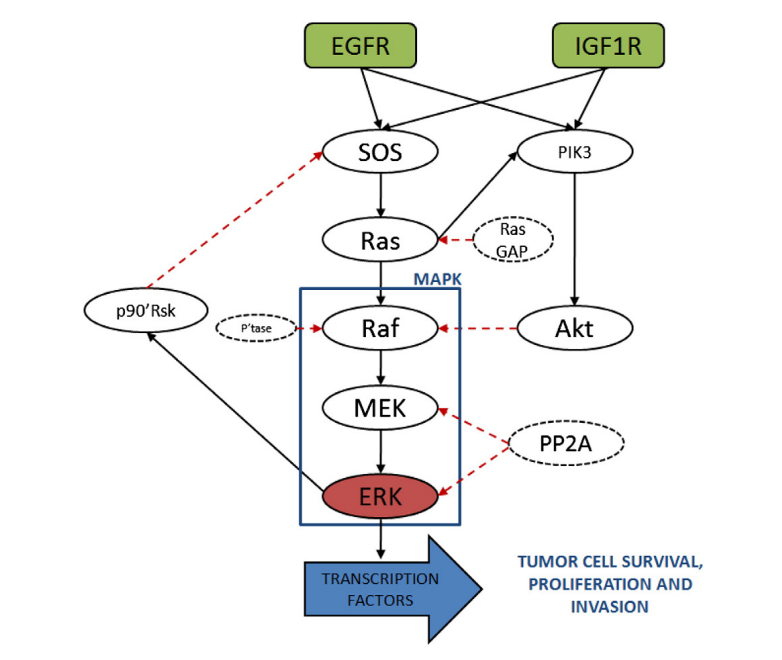

_MAPK Cascade_

MAPKs are serine/threonine kinases that mediate cellular activities including cell proliferation, differentiation, survival, death and transformation. The ERK pathway plays an important role in several steps of tumor development. Activation of both EGFR and IGF1R leads to the association of cytoplasmatic adaptor proteins, which recruit the guanine nucleotide exchange factor SOS-1 to the receptor complex. SOS-1 stimulates the exchange of GTP for GDP on the small GTPase RAS. Rafkinase activates MAPK/ERK kinase(MEK), which in turn activates ERK. ERK phosphorylates several transcription factors, including SOS, which causes SOS-Grb2 complex dissociation, and interferes with Ras activation. 

_PIK3 Pathway_

PIK3s are a family of lipid kinases that may phosphorylate the inositol ring of inositol phospholipids in the membrane (PIP2) to produce the second messenger phosphatidylinositol-3,4,5-triphosphate (PIP3), which activates downstream Akt.
Akt is a cytosolic kinase that can phosphorylate a wide variety of substrate proteins and can negatively regulate the MAPK pathway.

##Mathematical modeling and ODEs








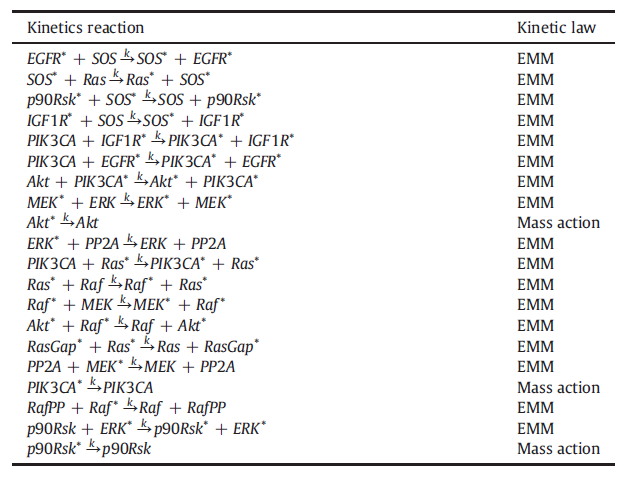

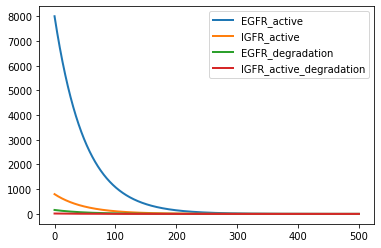

In [34]:
r = te.loadSBMLModel('BIOMD0000000427_url.xml')
val  = r.getAntimony()
selections=['time', 'EGFR_active','IGFR_active', 'EGFR_degradation', 'IGFR_active_degradation']
r.simulate(0,500,10000000, selections=selections)
r.plot()

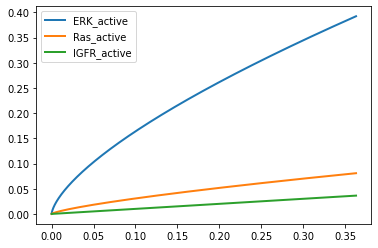

In [36]:
selections=['EGFR_active','ERK_active', 'Ras_active', 'IGFR_active']
r.simulate(0,500,10000000, selections=selections)
r.plot()

In [23]:
print(val)

// Created by libAntimony v2.13.2
model *MODEL1209230000()

  // Compartments and Species:
  compartment cell_nsclc;
  species EGFR_active in cell_nsclc, D_SOS in cell_nsclc, A_SOS in cell_nsclc;
  species Raf in cell_nsclc, Ras_active in cell_nsclc, Mek_active in cell_nsclc;
  species ERK in cell_nsclc, ERK_active in cell_nsclc, IGFR_active in cell_nsclc;
  species PI3KCA in cell_nsclc, PI3KCA_active in cell_nsclc, AKT_active in cell_nsclc;
  species AKT in cell_nsclc, PP2A in cell_nsclc, Ras in cell_nsclc, Raf_active in cell_nsclc;
  species Mek in cell_nsclc, RasGapActive in cell_nsclc, RafPP in cell_nsclc;
  species P90RskInactive in cell_nsclc, P90Rsk_Active in cell_nsclc;

  // Reactions:
  SOS_conformational_activation: D_SOS + EGFR_active => A_SOS + EGFR_active; SOS_conformational_activation_k_SOS_E*EGFR_active*D_SOS^SOS_conformational_activation_n_SOS/(SOS_conformational_activation_KM_SOS_E^SOS_conformational_activation_n_SOS + D_SOS^SOS_conformational_activation_n_SOS);
  kRa